**波士顿房价数据集介绍**
波士顿房价数据说明：此数据源于美国某经济学杂志上，分析研究波士顿房价( Boston HousePrice)的数据集。数据集中的每一行数据都是对波士顿周边或城镇房价的情况描述。本问题是一个回归问题。每个类的观察值数量是均等的，共有 506 个观察，13 个输入变量和1个输出变量。
数据特征：
1. CRIM: 城镇人均犯罪率 
2. ZN: 住宅用地所占比例 
3. INDUS: 城镇中非住宅用地所占比例 
4. CHAS: 虚拟变量,用于回归分析 
5. NOX: 环保指数 
6. RM: 每栋住宅的房间数 
7. AGE: 1940 年以前建成的自住单位的比例 
8. DIS: 距离 5 个波士顿的就业中心的加权距离 
9. RAD: 距离高速公路的便利指数 
10. TAX: 每一万美元的不动产税率
11. PTRATIO: 城镇中的教师学生比例 
12. B: 城镇中的黑人比例 
13. LSTAT: 地区中有多少房东属于低收入人群
14. MEDV: 自住房屋房价中位数（也就是均价）

**实验要求**
请完成代码中需要补充的部分

In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data64


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

一、加载需要的包

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

二、数据预处理
1. 读入数据和观察数据
看看是否需要进行数据预处理。如是否需要 1. 去除唯一属性；2. 处理缺失值；3. 特征编码；4. 数据标准化、正则化； 5. 特征选择（降维）

In [3]:
dataset = load_boston()
x_data = dataset.data
y_data = dataset.target
name_data =dataset.feature_names
print(name_data)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


2.特征工程-可视化各个特征与房价的关系


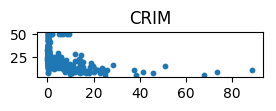

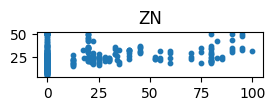

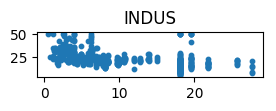

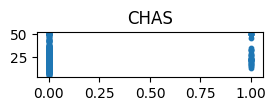

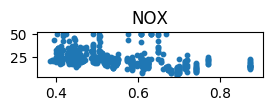

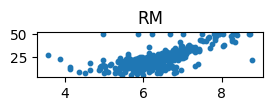

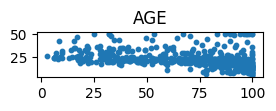

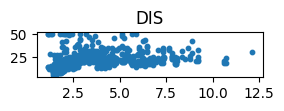

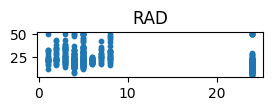

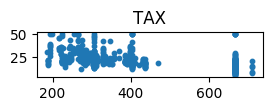

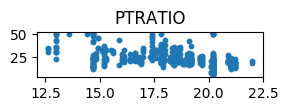

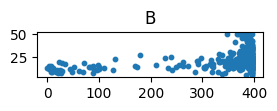

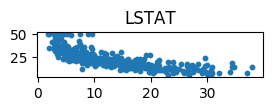

In [4]:
for i in range(13):
    plt.subplot(7,2,i+1) #7行2列第i+1个图
    plt.scatter(x_data[:,i],y_data,s=10)  #横纵坐标和点的大小
    plt.title(name_data[i])
    plt.show()
                                          #打印刻画每个维度特征与房价相关性的协方差矩阵


查看房价数据分布，发现有一部分数据等于50，视为异常数据

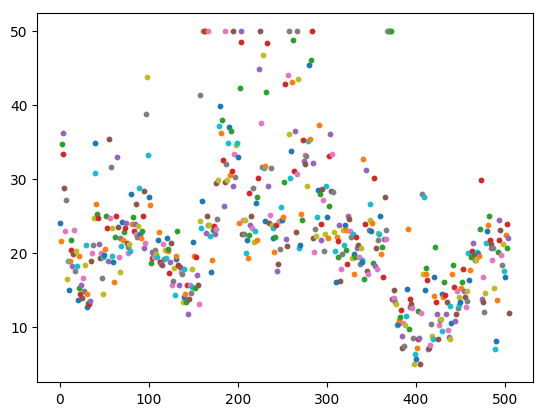

In [5]:
for i in range(len(y_data)):   
    plt.scatter(i,y_data[i],s=10)  #横纵坐标和点的大小

3、特征工程-处理数据
基于散点图，分析因变量与自变量的相关性，把不相关的数据剔除。经过上面散点图的分析，可以看到数据异常的变量需要特殊处理，根据散点图分析，房屋的’RM（每栋住宅的房间数）’，‘LSTAT（地区中有多少房东属于低收入人群）’，'PTRATIO(城镇中的教师学生比例）’特征与房价的相关性最大，所以，将其余不相关特征剔除。

In [6]:
i_=[]
for i in range(len(y_data)):
    if y_data[i] == 50:
        i_.append(i)#存储房价等于50 的异常值下标
x_data = np.delete(x_data, i_, axis=0)                           #删除样本异常值数据
y_data = np.delete(y_data, i_, axis=0)                           #删除标签异常值
name_data = dataset.feature_names
j_=[]
for i in range(13):
    if name_data[i] == 'RM' or name_data[i] == 'PTRATIO' or name_data[i] == 'LSTAT' : #提取'RM'、'PTRATIO'、'LSTAT'三个主要特征
        continue
    j_.append(i)#存储其他次要特征下标
x_data = np.delete(x_data,j_,axis=1)#在总特征中删除次要特征
print(np.shape(y_data))
print(np.shape(x_data))

(490,)
(490, 3)


4、数据分割：数据分割为训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(x_data,y_data,random_state = 0,test_size = 0.20)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

392
98
392
98


5、数据归一化

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

#标签归一化的目的是什么呢，实验证明，归一化之后结果好了0.1左右
y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1)) #转化为任意行一列
y_test = min_max_scaler.fit_transform(y_test.reshape(-1,1)) #转化为一列


三、模型训练  

注r2_score(https://blog.csdn.net/Softdiamonds/article/details/80061191)  

![](https://ai-studio-static-online.cdn.bcebos.com/c4ec308469da4cdf9b15658a8ee6f9bafc901d37d69644ddbd5989f20877d529)
越接近1效果越好，为0表示与取均值接近，为负则表示连平均值都不如
  
1.线性回归

In [9]:
from sklearn import linear_model
#请完成线性回归的代码，生成lr_y_predict作为测试集的预测结果
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr_y_predict=lr.predict(X_test)


from sklearn.metrics import r2_score
score_lr = r2_score(y_test,lr_y_predict)

2.岭回归

In [11]:
#请完成岭回归的代码，并设置适当的alpha参数值
rr = linear_model.Ridge(alpha= 1)
rr.fit(X_train,y_train)
rr_y_predict=rr.predict(X_test)
score_rr = r2_score(y_test,rr_y_predict)
score_rr

0.7061027513791873

3.lasso

In [12]:
lassr = linear_model.Lasso(alpha=.0001)
lassr.fit(X_train,y_train)
lassr_y_predict=lassr.predict(X_test)

score_lassr = r2_score(y_test,lassr_y_predict)
print(score_lassr)


0.7088366128882595


4.SVR

In [13]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) #高斯核
svr_lin = SVR(kernel='linear', C=100, gamma='auto') #线性核
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1) #径向基核函数
svr_rbf_y_predict=svr_rbf.fit(X_train, y_train).predict(X_test)
score_svr_rbf = r2_score(y_test,svr_rbf_y_predict)  
svr_lin_y_predict=svr_lin.fit(X_train, y_train).predict(X_test)
score_svr_lin = r2_score(y_test,svr_lin_y_predict)   
svr_poly_y_predict=svr_poly.fit(X_train, y_train).predict(X_test)
score_svr_poly = r2_score(y_test,svr_poly_y_predict)   
 
              
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
# lw = 2

# svrs = [svr_rbf, svr_lin, svr_poly]
# kernel_label = ['RBF', 'Linear', 'Polynomial']
# model_color = ['m', 'c', 'g']

# for ix, svr in enumerate(svrs):
#     print("ix:",ix)
#     print("svr:",svr)
#     axes[ix].plot(X_train, svr.fit(X_train, y_train).predict(X_train), color=model_color[ix], lw=lw,
#                   label='{} model'.format(kernel_label[ix]))
#     axes[ix].scatter(X_train[svr.support_], y_train[svr.support_], facecolor="none",
#                      edgecolor=model_color[ix], s=50,
#                      label='{} support vectors'.format(kernel_label[ix]))
#     axes[ix].scatter(X_train[np.setdiff1d(np.arange(len(X_train)), svr.support_)],
#                      y_train[np.setdiff1d(np.arange(len(y_train)), svr.support_)],
#                      facecolor="none", edgecolor="k", s=50,
#                      label='other training data')
#     axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
#                     ncol=1, fancybox=True, shadow=True)

# fig.text(0.5, 0.04, 'data', ha='center', va='center')
# fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#绘制真实值和预测值对比图
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(-0.2,2) 
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()

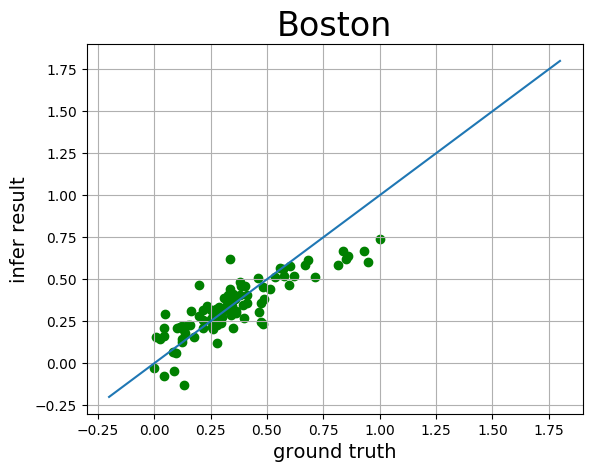

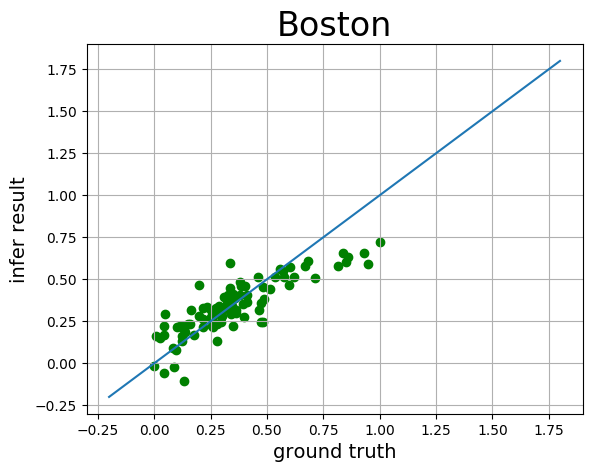

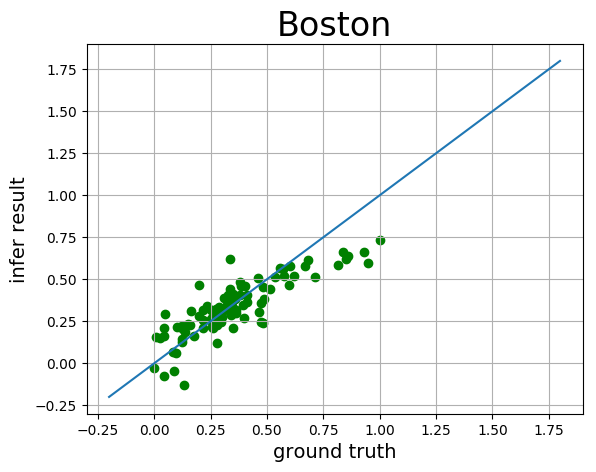

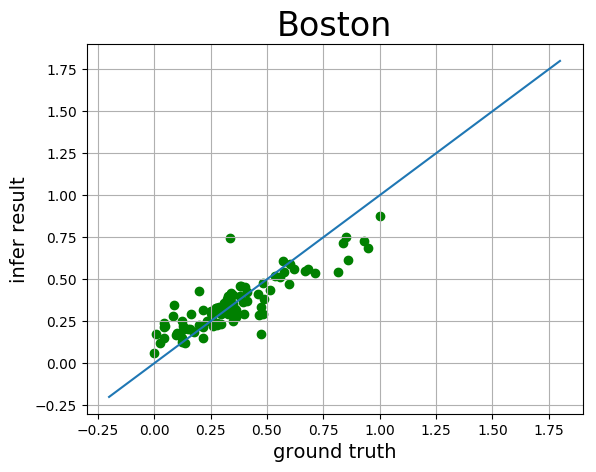

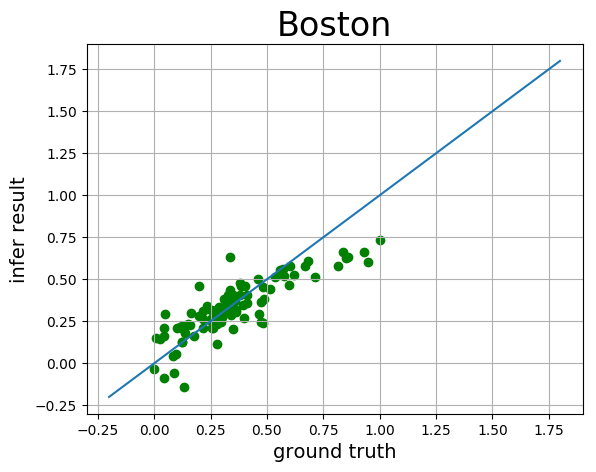

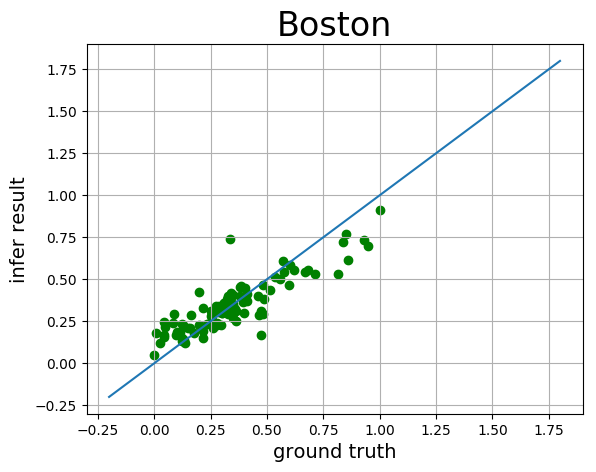

score of lr: 0.7091901425425999
score of rr: 0.7061027513791873
score of lassr: 0.7088366128882595
score of svr_rbf: 0.7340233064585013
score of svr_lin: 0.7052490886318461
score of svr_poly: 0.7475332622876592


In [15]:
draw_infer_result(y_test,lr_y_predict)
draw_infer_result(y_test,rr_y_predict)
draw_infer_result(y_test,lassr_y_predict)
draw_infer_result(y_test,svr_rbf_y_predict)
draw_infer_result(y_test,svr_lin_y_predict)
draw_infer_result(y_test,svr_poly_y_predict)
print("score of lr:",score_lr)
print("score of rr:",score_rr)
print("score of lassr:",score_lassr)
print("score of svr_rbf:",score_svr_rbf)
print("score of svr_lin:",score_svr_lin)
print("score of svr_poly:",score_svr_poly)

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 